# **FIRE INTERVENTIONS AND WEATHER DATA CORRELATIONS**

**The task in this notebook is to merge the fire interventions and weather data and explore to find any correlations between the number of incidents and the weather conditions. Only data from 2010 - 2017 is analysed here. The Fire Interventions data is obtained from the open data protal of "Ville de Montreal" and the Weather data is obtained from "weather.gc.ca"**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
weather = pd.read_csv('weather_combined.csv')
fire = pd.read_csv('fire_2010_2017.csv')


In [37]:
fire.drop(["creation_date_time"],axis=1,inplace=True)
fire.head()

,creation_datetime,incident_nbr,incident_type_desc,description_groupe,caserne,nom_ville,nom_arrond,division,latitude,longitude,nombre_unites
0,2015-01-01 00:03:22,1,Inondation,Sans incendie,26,Montréal,Plateau Mont-Royal,11,45.535698,-73.580575,1.0
1,2015-01-01 00:05:58,2,Ac.véh./1R/s.v./ext/29B/D,Premier répondant,25,Montréal,Ville-Marie,10,45.494499,-73.574247,2.0
2,2015-01-01 00:08:34,3,Appel de Cie de détection,Alarmes-incendies,64,Montréal,Lachine,7,45.442005,-73.665779,3.0
3,2015-01-01 00:11:28,4,Premier répondant,Premier répondant,38,Montréal,Rivière-des-Prairies / Pointe-aux-Trembles,6,45.641294,-73.489981,1.0
4,2015-01-01 00:14:06,5,Odeur suspecte - gaz,Sans incendie,34,Montréal,Côte-des-Neiges / Notre-Dame-de-Grâce,9,45.483883,-73.615028,2.0


In [38]:
fdh = fire.creation_datetime.str.split(':',expand=True)
fire['fdateHr'] = fdh[0]
fire.head()

,creation_datetime,incident_nbr,incident_type_desc,description_groupe,caserne,nom_ville,nom_arrond,division,latitude,longitude,nombre_unites,fdateHr
0,2015-01-01 00:03:22,1,Inondation,Sans incendie,26,Montréal,Plateau Mont-Royal,11,45.535698,-73.580575,1.0,2015-01-01 00
1,2015-01-01 00:05:58,2,Ac.véh./1R/s.v./ext/29B/D,Premier répondant,25,Montréal,Ville-Marie,10,45.494499,-73.574247,2.0,2015-01-01 00
2,2015-01-01 00:08:34,3,Appel de Cie de détection,Alarmes-incendies,64,Montréal,Lachine,7,45.442005,-73.665779,3.0,2015-01-01 00
3,2015-01-01 00:11:28,4,Premier répondant,Premier répondant,38,Montréal,Rivière-des-Prairies / Pointe-aux-Trembles,6,45.641294,-73.489981,1.0,2015-01-01 00
4,2015-01-01 00:14:06,5,Odeur suspecte - gaz,Sans incendie,34,Montréal,Côte-des-Neiges / Notre-Dame-de-Grâce,9,45.483883,-73.615028,2.0,2015-01-01 00


In [39]:
weather.head()

,Unnamed: 0,Date/Time,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Stn Press (kPa),wdateHr
0,0,2010-01-01 00:00,-3.8,-5.0,91.0,4.0,11.0,101.11,2010-01-01 00
1,1,2010-01-01 01:00,-4.7,-5.4,95.0,3.0,15.0,101.05,2010-01-01 01
2,2,2010-01-01 02:00,-4.6,-5.3,95.0,3.0,15.0,101.05,2010-01-01 02
3,3,2010-01-01 03:00,-4.6,-5.4,94.0,3.0,15.0,101.02,2010-01-01 03
4,4,2010-01-01 04:00,-4.9,-5.7,94.0,3.0,15.0,100.99,2010-01-01 04


In [40]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 9 columns):
Unnamed: 0             70128 non-null int64
Date/Time              70128 non-null object
Temp (°C)              69574 non-null float64
Dew Point Temp (°C)    69578 non-null float64
Rel Hum (%)            69578 non-null float64
Wind Dir (10s deg)     68356 non-null float64
Wind Spd (km/h)        69578 non-null float64
Stn Press (kPa)        69575 non-null float64
wdateHr                70128 non-null object
dtypes: float64(6), int64(1), object(2)
memory usage: 4.8+ MB


In [41]:
weather.fillna(method='ffill',inplace=True)
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 9 columns):
Unnamed: 0             70128 non-null int64
Date/Time              70128 non-null object
Temp (°C)              70128 non-null float64
Dew Point Temp (°C)    70128 non-null float64
Rel Hum (%)            70128 non-null float64
Wind Dir (10s deg)     70128 non-null float64
Wind Spd (km/h)        70128 non-null float64
Stn Press (kPa)        70128 non-null float64
wdateHr                70128 non-null object
dtypes: float64(6), int64(1), object(2)
memory usage: 4.8+ MB


In [51]:
# Merging Fire and weather datasets.
fire_weather = pd.merge(left=fire, right=weather, left_on=fire.fdateHr, right_on=weather.wdateHr, how='left')
fire_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 935094 entries, 0 to 935093
Data columns (total 21 columns):
creation_datetime      935094 non-null object
incident_nbr           935094 non-null int64
incident_type_desc     935094 non-null object
description_groupe     935094 non-null object
caserne                935094 non-null int64
nom_ville              935094 non-null object
nom_arrond             935094 non-null object
division               935094 non-null int64
latitude               935094 non-null float64
longitude              935094 non-null float64
nombre_unites          934878 non-null float64
fdateHr                935094 non-null object
Unnamed: 0             935094 non-null int64
Date/Time              935094 non-null object
Temp (°C)              935094 non-null float64
Dew Point Temp (°C)    935094 non-null float64
Rel Hum (%)            935094 non-null float64
Wind Dir (10s deg)     935094 non-null float64
Wind Spd (km/h)        935094 non-null float64
Stn Press (

In [44]:
# Normalize the dataset by dividing the frequency of the incidents at a temperature / no times the temperature was observed

weather_temp = weather[['wdateHr', 'Temp (°C)']].groupby('Temp (°C)').count()
fire_weather_temp = fire_weather[['incident_nbr', 'Temp (°C)']].groupby('Temp (°C)').count()
fire_weather_freq = pd.concat([weather_temp, fire_weather], axis = 1 )
fire_weather_freq['frequency'] = fire_weather_freq['incident_nbr'] / fire_weather_freq['wdateHr']
fire_weather_freq

,wdateHr,incident_nbr,frequency
Temp (°C),,,
-27.5,2,39,19.500000
-27.4,2,54,27.000000
-27.2,3,43,14.333333
-27.0,1,13,13.000000
-26.9,2,49,24.500000
-26.8,2,32,16.000000
-26.7,2,49,24.500000
-26.6,4,58,14.500000
-26.5,2,28,14.000000


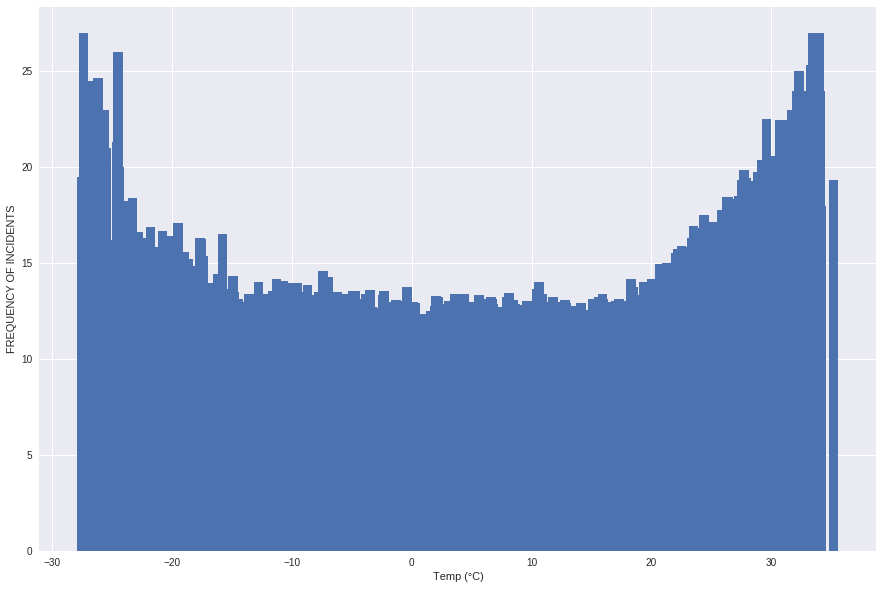

In [48]:
plt.figure(figsize=(15,10))
plt.bar(fire_weather_freq.index, fire_weather_freq['frequency'])

plt.xlabel("Temp (°C)") 
plt.ylabel("FREQUENCY OF INCIDENTS") 
plt.show()

**The no of intervention seem to be peaking at extreme temperatures.**

In [54]:
weather_dew = weather[['wdateHr', 'Rel Hum (%)']].groupby('Rel Hum (%)').count()
fire_weather_dew = fire_weather[['incident_nbr', 'Rel Hum (%)']].groupby('Rel Hum (%)').count()
fire_weather_freq = pd.concat([weather_dew, fire_weather_dew], axis = 1 )
fire_weather_freq['frequency'] = fire_weather_freq['incident_nbr'] / fire_weather_freq['wdateHr']
fire_weather_freq.head()

,wdateHr,incident_nbr,frequency
Rel Hum (%),,,
12.0,1,23,23.000000
13.0,2,32,16.000000
14.0,5,101,20.200000
15.0,3,61,20.333333
16.0,5,100,20.000000


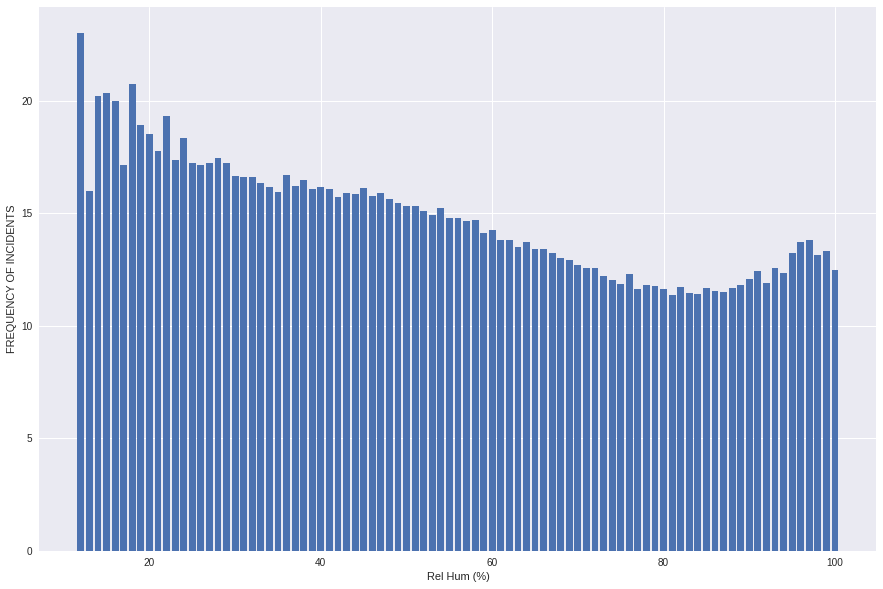

In [55]:
plt.figure(figsize=(15,10))
plt.bar(fire_weather_freq.index, fire_weather_freq['frequency'])

plt.xlabel("Rel Hum (%)") 
plt.ylabel("FREQUENCY OF INCIDENTS") 
plt.show()

**The no of intervention seem to be peaking at low humidity**

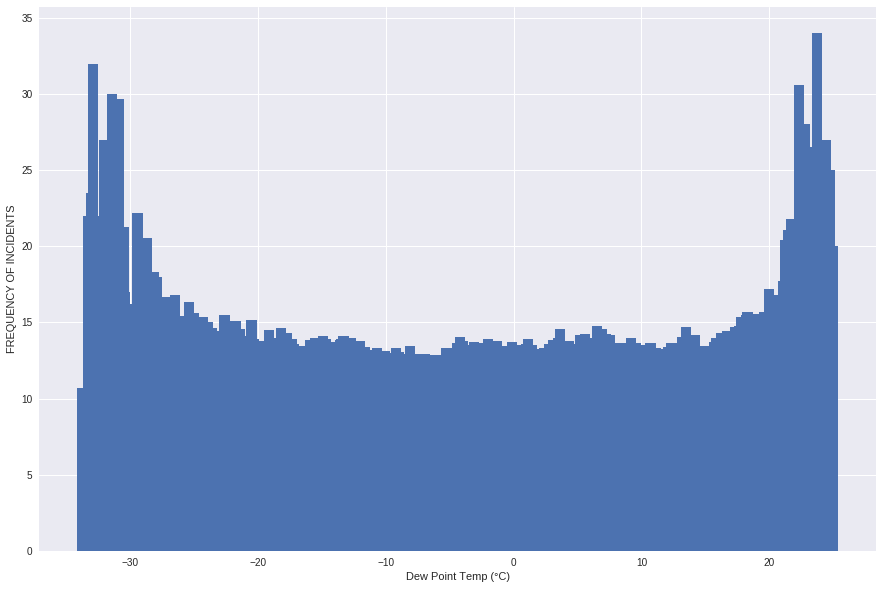

In [58]:
weather_wind = weather[['wdateHr', 'Wind Spd (km/h)']].groupby('Wind Spd (km/h)').count()
fire_weather_wind = fire_weather[['incident_nbr', 'Wind Spd (km/h)']].groupby('Wind Spd (km/h)').count()
fire_weather_freq = pd.concat([weather_wind, fire_weather_wind], axis = 1 )
fire_weather_freq['frequency'] = fire_weather_freq['incident_nbr'] / fire_weather_freq['wdateHr']

plt.figure(figsize=(15,10))
plt.bar(fire_weather_freq.index, fire_weather_freq['frequency'])
plt.xlabel("Dew Point Temp (°C)") 
plt.ylabel("FREQUENCY OF INCIDENTS") 
plt.show()

 **This graph looks a lot like the temperature graph.**

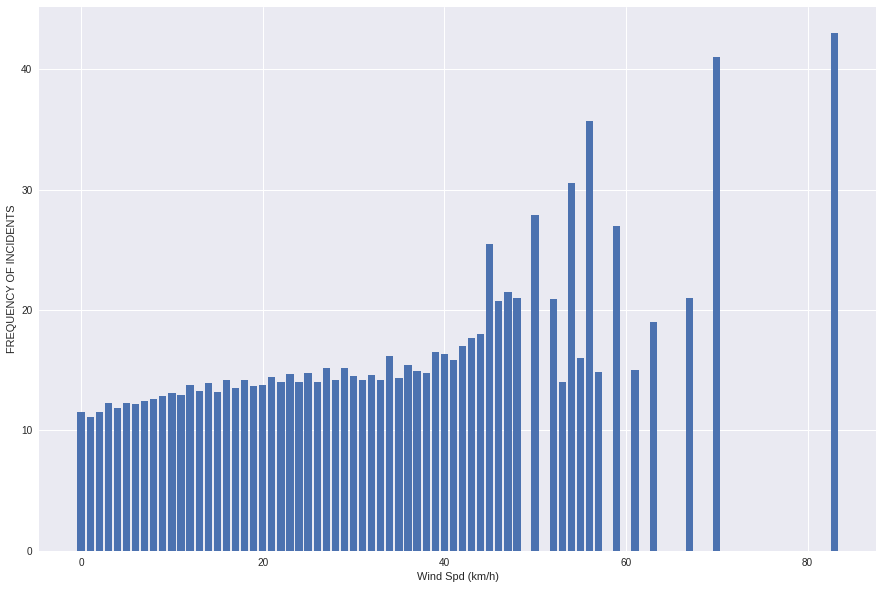

In [59]:
weather_wind = weather[['wdateHr', 'Wind Spd (km/h)']].groupby('Wind Spd (km/h)').count()
fire_weather_wind = fire_weather[['incident_nbr', 'Wind Spd (km/h)']].groupby('Wind Spd (km/h)').count()
fire_weather_freq = pd.concat([weather_wind, fire_weather_wind], axis = 1 )
fire_weather_freq['frequency'] = fire_weather_freq['incident_nbr'] / fire_weather_freq['wdateHr']

plt.figure(figsize=(15,10))
plt.bar(fire_weather_freq.index, fire_weather_freq['frequency'])
plt.xlabel("Wind Spd (km/h)") 
plt.ylabel("FREQUENCY OF INCIDENTS") 
plt.show()

**The graph seems to be showing an increase in interventions as the wind speed increases, but since lot of data in this column was missing this trend cannot be proved.**